### Part 2: Programming Problems

#### Problem 1: Bell Curve Fitting
##### (1) Import dataset1.csv

Import the file `dataset1.csv` (100 rows, 2 columns) using `np.loadtxt` with `skiprows=2` and `delimiter=","`.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Import dataset1.csv
data1 = np.loadtxt('dataset1.csv', skiprows=2, delimiter=",")
# First column: z, Second column: y
z_data = data1[:, 0]
y_data = data1[:, 1]
N = data1.shape[0]
print("Dataset1 shape:", data1.shape)

Dataset1 shape: (100, 2)


##### (2) Plot the Point Cloud

Plot the data points with the first column on the x-axis and the second column on the y-axis.

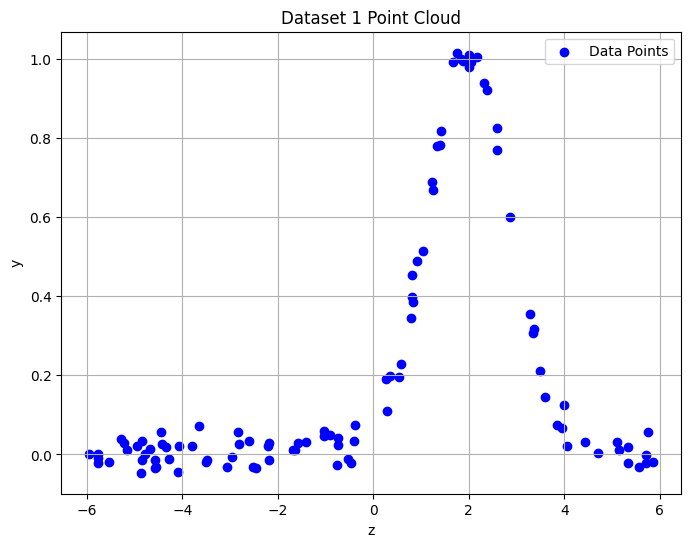

In [3]:
plt.figure(figsize=(8, 6))
plt.scatter(z_data, y_data, color='blue', label='Data Points')
plt.xlabel('z')
plt.ylabel('y')
plt.title('Dataset 1 Point Cloud')
plt.legend()
plt.grid(True)
plt.show()

##### (3) Define Model and Objective Function

Define the bell curve model:
$$
m(z;x) = \exp\Bigl(-\frac{(z - x_1)^2}{x_2}\Bigr)
$$
and the mean squared error objective:
$$
f(x) = \frac{1}{N} \sum_{i=1}^{N} \Bigl(m(z_i;x) - y_i\Bigr)^2.
$$

Evaluate $ f(x) $ at $ x = (1,0.5) $ and $ x = (0.5,1) $.

In [4]:
def bell_model(z, x):
    # x[0]: center, x[1]: width parameter
    return np.exp(-((z - x[0])**2) / x[1])

def objective(x, z, y):
    m = bell_model(z, x)
    return np.mean((m - y)**2)

# Evaluate objective at two sample parameter values:
print("f([1, 0.5]) =", objective([1, 0.5], z_data, y_data))
print("f([0.5, 1]) =", objective([0.5, 1], z_data, y_data))

f([1, 0.5]) = 0.11204289613814822
f([0.5, 1]) = 0.15009253657239355


##### (4) Show the Gradient of f

We want to show that the gradient is given by:
$$
\nabla f(x) = \frac{2}{N}\sum_{i=1}^{N} \Bigl(m(z_i;x)-y_i\Bigr)
\begin{pmatrix}
-\frac{\partial m(z_i;x)}{\partial x_1} \\
-\frac{\partial m(z_i;x)}{\partial x_2}
\end{pmatrix},
$$
with
$$
\frac{\partial m(z;x)}{\partial x_1} = m(z;x)\cdot \frac{2(z-x_1)}{x_2},\quad
\frac{\partial m(z;x)}{\partial x_2} = m(z;x)\cdot \frac{(z-x_1)^2}{x_2^2}.
$$

##### (5) Implement the Gradient Function

Write a function that computes $ \nabla f(x) $ for any $ x $ using the formulas above.
Evaluate the gradient at $ x = (1,0.5) $ and $ x = (0.5,1) $.

In [5]:
def grad_objective(x, z, y):
    m = bell_model(z, x)
    error = m - y
    # Compute derivatives using the chain rule:
    dm_dx1 = m * (2 * (z - x[0]) / x[1])
    dm_dx2 = m * ((z - x[0])**2 / (x[1]**2))
    # Gradient (note the negative sign from differentiating the exponent):
    grad_x1 = (2/N) * np.sum(error * (-dm_dx1))
    grad_x2 = (2/N) * np.sum(error * (-dm_dx2))
    return np.array([grad_x1, grad_x2])

# Evaluate the gradient at given points:
print("grad f([1, 0.5]) =", grad_objective([1, 0.5], z_data, y_data))
print("grad f([0.5, 1]) =", grad_objective([0.5, 1], z_data, y_data))

grad f([1, 0.5]) = [0.15222549 0.0578975 ]
grad f([0.5, 1]) = [0.09240185 0.02646519]
